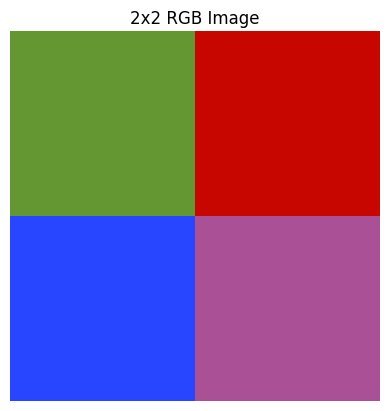

In [37]:
# VISUALIZE INPUT TENSORS OF SHAPE: [batch_size, channels, height, width]

# eg.
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# (example values) -> pixel values between 0 to 255
tensor = torch.tensor([[
    [[100,200], [40,170]],  # Red channel
    [[150,6], [70,80]],  # Green channel
    [[50,0], [255,150]]   # Blue channel
]])

# Convert to numpy and prepare for visualization
image = tensor.squeeze(0)  # Remove batch dimension -> 3x2x2
image = image.permute(1, 2, 0)  # Change to HxWxC format -> 2x2x3
image = image.numpy()  # Convert to numpy array

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.title('2x2 RGB Image')
plt.show()

In [ ]:
# function to visualize tensors

def plot_tensor(input):
    # Convert to numpy and prepare for visualization
    image = input.squeeze(0)  # Remove batch dimension
    image = image.permute(1, 2, 0)  # Change to HxWxC format
    image = image.numpy()  # Convert to numpy array

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

In [39]:


# INTERPOLATION

input = torch.arange(1, 2701, dtype=torch.float32).view(1, 3, 30, 30) 
# arange: is for creating a tensor with (eg. values from 1 to 12)
# view: is for reshaping the tensor to 1x3x30x30 - [batch_size, channels, height, width]

print("input: ", input)
print("input shape: ", input.shape)

m = nn.Upsample(scale_factor=2, mode='nearest')
res = m(input)
# Upsample: is for resizing the input tensor - essentially, increasing the resolution of the image.
# scale_factor: if 2, then the height and width of the image will be doubled.
# mode: nearest - the nearest pixel value is used for the new pixels.
# other modes: bilinear, bicubic, trilinear, etc

print("nearest interpolation: ", res)

input:  tensor([[[[1.0000e+00, 2.0000e+00, 3.0000e+00,  ..., 2.8000e+01,
           2.9000e+01, 3.0000e+01],
          [3.1000e+01, 3.2000e+01, 3.3000e+01,  ..., 5.8000e+01,
           5.9000e+01, 6.0000e+01],
          [6.1000e+01, 6.2000e+01, 6.3000e+01,  ..., 8.8000e+01,
           8.9000e+01, 9.0000e+01],
          ...,
          [8.1100e+02, 8.1200e+02, 8.1300e+02,  ..., 8.3800e+02,
           8.3900e+02, 8.4000e+02],
          [8.4100e+02, 8.4200e+02, 8.4300e+02,  ..., 8.6800e+02,
           8.6900e+02, 8.7000e+02],
          [8.7100e+02, 8.7200e+02, 8.7300e+02,  ..., 8.9800e+02,
           8.9900e+02, 9.0000e+02]],

         [[9.0100e+02, 9.0200e+02, 9.0300e+02,  ..., 9.2800e+02,
           9.2900e+02, 9.3000e+02],
          [9.3100e+02, 9.3200e+02, 9.3300e+02,  ..., 9.5800e+02,
           9.5900e+02, 9.6000e+02],
          [9.6100e+02, 9.6200e+02, 9.6300e+02,  ..., 9.8800e+02,
           9.8900e+02, 9.9000e+02],
          ...,
          [1.7110e+03, 1.7120e+03, 1.7130e+03,  ...

In [9]:
# VISUALIZE INTERPOLATION

import matplotlib.pyplot as plt

def plot_tensor(tensor):
    """
    plots the visual representation of a tensor.
    """
    plt.imshow(tensor.view(tensor.shape[-2], tensor.shape[-1]).numpy(), cmap='gray')
    plt.show()

plot_tensor(input)


RuntimeError: shape '[2, 2]' is invalid for input of size 12